In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime
import cPickle
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
#os.chdir('/Users/Jonathan/citiBike_NYC')
sns.set_context("poster")
sns.set(rc={"figure.figsize": (6, 6)})
import warnings; warnings.filterwarnings('ignore')

In [2]:
# Don't recalculate these stations...
from os import listdir
import re
from os.path import isfile, join
path = '/Users/Jonathan/citiBike_NYC/station_data'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
station_files = [f for f in onlyfiles if re.search(r'station_\d+.cPickle',f)]
captured_stations = []
for filename in station_files:
    nums = re.findall(r'\d+',filename)
    captured_stations.append(nums[0])
print captured_stations

TIME_FRAME = 30
STATIONS = [s for s in map(int,captured_stations) if s < 100000] # captured_stations
YEAR = 2015
print STATIONS
print len(STATIONS)

['116', '119', '120', '127', '128', '137', '143', '144', '146', '147', '150', '151', '152', '153', '157', '160', '161', '164', '167', '168', '173', '174', '195', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2009', '2010', '2012', '2017', '2021', '2022', '2023', '212', '216', '217', '218', '223', '224', '225', '228', '229', '232', '233', '236', '237', '238', '239', '241', '242', '243', '244', '245', '247', '248', '249', '250', '251', '252', '253', '254', '255', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '270', '274', '275', '276', '278', '279', '280', '281', '282', '284', '285', '289', '291', '293', '295', '296', '297', '298', '300', '3002', '301', '3017', '3019', '302', '303', '304', '3041', '3042', '3043', '3044', '3046', '3047', '3048', '3049', '305', '3050', '3052', '3053', '3054', '3055', '3056', '3057', '3058', '3059', '306', '3060', '3061', '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '307', '3070', '

In [3]:
def add_columns(df,station):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['station'] = station
    return df

In [4]:
import cPickle
station = 444
with open('station_' +str(station) +'.cPickle', 'r') as f:
    df = cPickle.load(f)
    df = add_columns(df,station)

#### add weather

In [5]:
# add weather
weather = pd.read_csv('/Users/Jonathan/citiBike_NYC/weather_data/temps.csv')
from datetime import datetime
weather['datetime'] = weather['datetime'].\
                        apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S').\
                              replace(minute=0).strftime('%Y-%m-%d %H:%M:%S'))
weather.index = weather['datetime']
del weather['datetime']
df = df.join(weather,how='left')
df = df.ffill()

In [6]:
for station in STATIONS:
    print station,
    with open('station_data/' +'station_' +str(station) +'.cPickle', 'r') as f:
        df_temp = cPickle.load(f)
        df_temp = add_columns(df_temp,station)
        df_temp = df_temp.join(weather,how='left')
        df_temp = df_temp.ffill()
        df = df.append(df_temp)

116 119 120 127 128 137 143 144 146 147 150 151 152 153 157 160 161 164 167 168 173 174 195 2000 2001 2002 2003 2004 2005 2006 2008 2009 2010 2012 2017 2021 2022 2023 212 216 217 218 223 224 225 228 229 232 233 236 237 238 239 241 242 243 244 245 247 248 249 250 251 252 253 254 255 257 258 259 260 261 262 263 264 265 266 267 268 270 274 275 276 278 279 280 281 282 284 285 289 291 293 295 296 297 298 300 3002 301 3017 3019 302 303 304 3041 3042 3043 3044 3046 3047 3048 3049 305 3050 3052 3053 3054 3055 3056 3057 3058 3059 306 3060 3061 3062 3063 3064 3065 3066 3067 3068 3069 307 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 308 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 309 3090 3091 3092 3093 3094 3095 3096 3097 3098 3099 310 3101 3102 3103 3104 3105 3106 3107 3108 3109 311 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 312 3120 3121 3122 3123 3124 3125 3126 3127 3128 3129 313 3132 3134 3135 3136 3137 3138 3139 314 3140 3141 3142 3143 3144 3145 3146 3147 3148 315 3150 315

In [7]:
df.head()

,net_change,year,month,dayofweek,hour,minute,station,temp,humidity,windspeed,visibility,rain,snow
2015-01-01 00:00:00,0,2015,1,3,0,0,444,28,43,10.4,10,0,0
2015-01-01 00:30:00,0,2015,1,3,0,30,444,28,43,10.4,10,0,0
2015-01-01 01:00:00,0,2015,1,3,1,0,444,28,47,9.2,10,0,0
2015-01-01 01:30:00,0,2015,1,3,1,30,444,28,47,9.2,10,0,0
2015-01-01 02:00:00,1,2015,1,3,2,0,444,27,47,6.9,10,0,0


#### Get data from API

In [57]:
def roundTime(dt=None, roundTo=60):
    if dt == None : dt = datetime.datetime.now()
    seconds = (dt - dt.min).seconds
    # // is a floor division, not a comment on following line:
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [58]:
import requests
url = 'https://www.citibikenyc.com/stations/json'
r = requests.get(url)
r.text
r.json()
r.json().keys()
print r.json()['executionTime']
r.json()['stationBeanList']
len(r.json()['stationBeanList']) # 507 docks
r.json()['stationBeanList'][0] # First key/station
from pandas.io.json import json_normalize
stations_live = json_normalize(r.json()['stationBeanList']) # convert to DF

2016-02-16 09:02:11 AM


In [10]:
# stations_live[stations_live['id'] == 444]
# time_now = datetime.datetime.now()
# print time_now
# time_now_rounded = roundTime(time_now, roundTo=30*60)
# print time_now_rounded

##### Plot in CartoDB

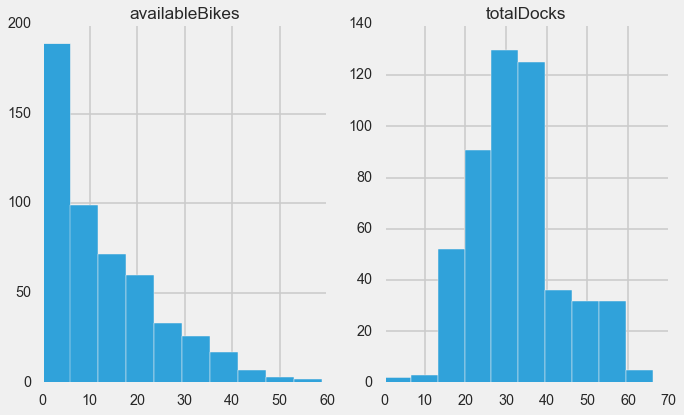

In [59]:
import ujson
from pandas.io.json import json_normalize

f,(ax1, ax2) = plt.subplots(1, 2)
ax1.hist(stations_live['availableBikes'])
ax1.set_title('availableBikes')
ax2.hist(stations_live['totalDocks'])
ax2.set_title('totalDocks')

In [60]:
filename_out = 'to_CartoDB.csv'
stations_live.to_csv(filename_out)

In [61]:
stations_live.shape
stations_live.columns
stations_live.statusValue.unique()  # array([u'In Service', u'Not In Service'], dtype=object)
len(stations_live[stations_live.statusValue=='Not In Service']) / float(len(stations_live[stations_live.statusValue=='In Service']))

0.009940357852882704

In [62]:
print stations_live.availableBikes.sum()
print stations_live.availableDocks.sum()

6409
10103


## Build a model

In [15]:
from sklearn import base, metrics
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score, KFold

### Model #0: Mean Model

In [16]:
class meanEstimator(base.BaseEstimator, base.RegressorMixin):
    def __init__ (self):
        self.ymdhm_avg = {}
        
    def fit(self,X,y):
        df = X.join(y)
        self.ymdhm_avg = df['net_change'].mean()
        return self
    
    def predict(self,X_test):
        #print self.ymdhm_avg.head()
        try:
            y_pred = []
            for r in range(X_test.shape[0]):
                try:
                    y_pred.append(self.ymdhm_avg)
                except:
                    y_pred.append(0)
            return y_pred    
        except:
            return -999

In [17]:
scores_meanModel = []
mse_meanModel = []
i = 0
for s in STATIONS:
    i += 1
    print i,
    df_station = df[df['station'] == s]
    X = df_station[['month','dayofweek','hour','minute']] 
    y = df_station['net_change']

    cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)    
    meanModel = meanEstimator()  # initialize
    r2 =  - cross_validation.cross_val_score(meanModel, X, y, cv=cv).mean()
    scores_meanModel.append(r2)
    m =  - cross_validation.cross_val_score(meanModel, X, y, cv=cv, scoring='mean_squared_error').mean()
    mse_meanModel.append(m)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [18]:
scores_meanModel

[0.0004135848113955176,
 0.00042709471057594817,
 0.00043144964516584895,
 0.00031395142118340047,
 0.00039107834455477387,
 0.00026986816580707449,
 0.00046509362798164978,
 0.00033585418498355279,
 0.00041062967327558652,
 0.00039668348850229184,
 0.00035884356757353019,
 0.00021319642724260124,
 0.00024495230254875102,
 0.00031755024317929869,
 0.00035488236302678723,
 0.00060007472400781521,
 0.00032894337255112704,
 0.0002208641359236152,
 0.00039495803579353561,
 0.0003336035083601474,
 0.00021981807045244882,
 0.00055338205490409467,
 0.00025772228988268919,
 0.00025108841861970488,
 0.00027711356747103235,
 0.00037614895400549518,
 0.00028135388131553805,
 0.00022893545804836268,
 0.0004593042577134998,
 0.00026049595782954291,
 0.0003642901909972629,
 0.00024628102683231788,
 0.0003736337619846375,
 0.0007691497785394019,
 0.000582038470859636,
 0.00026239036913404678,
 0.00058561252779709694,
 0.00027301308512079904,
 0.00043852110284684496,
 0.00029785159957280706,
 0.000226

In [19]:
mse_meanModel

[5.7122103238730118,
 0.22354404750760065,
 0.71904143280875243,
 8.2913718940544019,
 6.3961416853406714,
 8.692069857235083,
 1.5093158567000358,
 0.46976175533684061,
 2.6667992337487152,
 6.2827469676311223,
 4.5118533064150927,
 8.6046436914023978,
 2.9099877966878003,
 5.5918477450389972,
 2.0923676094912578,
 2.0691868876300958,
 5.5293429141998569,
 6.6145278578541751,
 4.6502488538400009,
 9.463209679366134,
 7.8495977411123992,
 3.9780094005508717,
 5.3692469286941256,
 3.0144397244321697,
 0.22098672079635259,
 2.9166346190707051,
 5.5758214650101374,
 6.3159581538133152,
 0.077892678062372253,
 13.309039370041015,
 3.9629602977766738,
 2.4778736969314914,
 5.3721626317263063,
 5.6322033428235017,
 2.4652178787394776,
 4.0751806997644247,
 1.9146249516501279,
 5.179059489463417,
 4.0977692675475978,
 0.92288441267556975,
 3.7669651092446932,
 0.65658211023374358,
 4.3690214788759958,
 2.4587484524204202,
 6.1697602070245559,
 10.672242245486565,
 3.6070256264004561,
 1.27288

In [20]:
# Save computation
import cPickle
with open('scores_meanModel.cPickle', 'w') as f:
    cPickle.dump(scores_meanModel, f)
with open('mse_meanModel.cPickle', 'w') as f:
    cPickle.dump(mse_meanModel, f)

### Model #1: Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
scores_linModel = []
mse_linModel = []
i = 0
for s in STATIONS:
    i += 1
    print i,
    df_station = df[df['station'] == s]
    X = df_station[['month','dayofweek','hour','minute','temp','humidity','windspeed','visibility','rain','snow']] 
    y = df_station['net_change']

    cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
    r2 =  - cross_validation.cross_val_score(LinearRegression(), X, y, cv=cv).mean()
    scores_linModel.append(r2)
    mse =  - cross_validation.cross_val_score(LinearRegression(), X, y, cv=cv, scoring='mean_squared_error').mean()
    mse_linModel.append(mse)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [22]:
scores_linModel

[-0.00077041274431454147,
 -0.01551570355192799,
 -0.021973927019163557,
 -0.005143537319237829,
 -0.002307876568321432,
 -0.054268834926189877,
 -0.014717877917614308,
 8.0425837981001894e-05,
 -0.0019344913333586623,
 -0.02234076478845139,
 -0.054201655658149619,
 -0.010937568100404815,
 -0.0137153033292369,
 -0.024438193873884139,
 -0.026899785749349786,
 -0.0017769851803383029,
 -0.0045579756684260677,
 -0.018892246454945295,
 -0.010341390759757757,
 -0.030704089786342797,
 -0.030763824159397275,
 -0.02036721019682668,
 -0.03290134065635799,
 -0.011498028014200407,
 -0.0065061622672742906,
 -0.010004993544671459,
 -0.041422278114323322,
 -0.02811118833206061,
 -0.01108386959054874,
 -0.0048894076893690689,
 0.00033827320005147543,
 -0.045760650449263099,
 -0.025210005408317193,
 -0.030112680550951086,
 -0.0094184321977143041,
 -0.0040142141769497043,
 -0.010714799575061284,
 -0.035570452017494751,
 -0.010994116709335412,
 -0.001900532014901607,
 -0.0015191697786155034,
 -0.00647915

In [23]:
mse_linModel

[5.7054062750975456,
 0.22000284562268257,
 0.70292358322858162,
 8.2460169467775444,
 6.3788078021288328,
 8.2176050289121001,
 1.486377224894754,
 0.46964384876973819,
 2.6605342128384479,
 6.1397871395775772,
 4.2662238111908106,
 8.5084394334312883,
 2.8693462985985847,
 5.4531074531804009,
 2.0353575953960927,
 2.0642949640543984,
 5.5024003271379911,
 6.4882512309115583,
 4.6002409453337822,
 9.1690801053863797,
 7.6061181802145272,
 3.8947123089724451,
 5.1908171169257979,
 2.9789252168806271,
 0.21948983062236799,
 2.8860033747859055,
 5.3427759322112847,
 6.1369134951443822,
 0.076988480836575598,
 13.240561085759936,
 3.962859951799262,
 2.3638932169644429,
 5.2346580209716347,
 5.458335901102271,
 2.4405903885622875,
 4.0577273930852886,
 1.8930437036127188,
 4.992909616207351,
 4.0507972370489043,
 0.92084925542131357,
 3.7603907718047429,
 0.65206528307977318,
 4.3577868425684869,
 2.4525878753799648,
 6.0777371854909301,
 10.147721206712095,
 3.5743946045193753,
 1.270153

In [24]:
# Save computation
import cPickle
with open('scores_linModel.cPickle', 'w') as f:
    cPickle.dump(scores_linModel, f)
with open('mse_linModel.cPickle', 'w') as f:
    cPickle.dump(mse_linModel, f)

### Model #2: SVM

In [25]:
# from sklearn import svm
# scores_svmModel = []
# mse_svmModel = []
# i = 0
# for s in STATIONS:
#     i += 1
#     print i,
#     df_station = df[df['station'] == s]
#     X = df_station[['year','month','dayofweek','hour','minute','temp','humidity','windspeed','visibility','rain','snow']] 
#     y = df_station['net_change']

#     cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
#     r2 =  - cross_validation.cross_val_score(svm.SVR(), X, y, cv=cv).mean()
#     scores_svmModel.append(r2)
#     mse =  - cross_validation.cross_val_score(svm.SVR(), X, y, cv=cv, scoring='mean_squared_error').mean()
#     mse_svmModel.append(mse)

In [26]:
# # Save computation
# import cPickle
# with open('scores_svmModel.cPickle', 'w') as f:
#     cPickle.dump(scores_svmModel, f)
# with open('mse_svmModel.cPickle', 'w') as f:
#     cPickle.dump(mse_svmModel, f)

### Model #3 Random Forest

In [27]:
from sklearn import datasets, tree, utils

scores_rfModel = []
mse_rfModel = []
feature_importance = []
i = 0
for s in STATIONS:
    i += 1
    print i,
    df_station = df[df['station'] == s]
    X = df_station[['month','dayofweek','hour','minute','temp','humidity','windspeed','visibility','rain','snow']]
    y = df_station['net_change']
    
    tree_clf = tree.DecisionTreeClassifier(max_depth=10)
    
    cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
    r2 =  - cross_validation.cross_val_score(tree_clf, X, y, cv=cv).mean()
    scores_rfModel.append(r2)
    mse =  - cross_validation.cross_val_score(tree_clf, X, y, cv=cv, scoring='mean_squared_error').mean()
    mse_rfModel.append(mse)
    
    # feature importance
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
    tree_clf = tree.DecisionTreeClassifier(max_depth=10)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    feature_importance.append(tree_clf.feature_importances_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [28]:
np.mean(feature_importance,axis = 0)

array([ 0.21315096,  0.07656561,  0.35278453,  0.0498658 ,  0.11457561,
        0.09946274,  0.04541711,  0.03854298,  0.0087932 ,  0.00084146])

In [29]:
scores_rfModel

[-0.38069725711356062,
 -0.85096129197641623,
 -0.70314022045629332,
 -0.35417841579082288,
 -0.4263137657011023,
 -0.55098692642912073,
 -0.5931812355806203,
 -0.78663163291463711,
 -0.46705972827480124,
 -0.39994873109459117,
 -0.46516277877467316,
 -0.31998205588310691,
 -0.49815431940528077,
 -0.62730069213022288,
 -0.55130735708792611,
 -0.46349653934888496,
 -0.3575749807741605,
 -0.4760446039477057,
 -0.44947449371955911,
 -0.43104332222507047,
 -0.43314534734683408,
 -0.42143040246090752,
 -0.48447833888746478,
 -0.53524737246859777,
 -0.86498333760574209,
 -0.49902589079723148,
 -0.57782619841066407,
 -0.46454755190976671,
 -0.93684952576262503,
 -0.45930530633170985,
 -0.45910023071007428,
 -0.49055370417841571,
 -0.46058702896693166,
 -0.42483978467059724,
 -0.57657011022814664,
 -0.40866444501409893,
 -0.53263265829274542,
 -0.58437580107664699,
 -0.53565752371186881,
 -0.73504229684696232,
 -0.59134837221225334,
 -0.72299410407587794,
 -0.37004614201486802,
 -0.50020507562

In [30]:
mse_rfModel

[6.1984106639323251,
 0.23687516021532939,
 0.69871827736477832,
 8.4443476031786737,
 6.4483978467059728,
 5.7674442450653673,
 1.4925916431684185,
 0.5064214304024609,
 2.8619712894129714,
 6.0626506024096374,
 3.3548577287874908,
 8.7840938220968994,
 2.9599333504229688,
 5.2112022558318376,
 1.8689438605485775,
 2.1927839015637018,
 5.7774288643937446,
 5.4004614201486802,
 4.5744680851063837,
 7.9845424250192263,
 7.2074211740579344,
 3.8848628556780311,
 4.7947833888746469,
 2.7202384004101514,
 0.23068443988720838,
 2.9923224814150218,
 4.1946423993847732,
 4.4813765701102275,
 0.078082542937708277,
 13.635862599333501,
 4.1650602409638555,
 2.0476288131248395,
 4.7792104588567037,
 4.4049859010510124,
 2.3220584465521661,
 4.3690976672648034,
 1.996808510638298,
 3.2251345808766985,
 4.0531274032299409,
 0.99738528582414765,
 3.9945654960266608,
 0.7015637016149705,
 4.6252883875929252,
 2.5883106895667778,
 5.7390284542425025,
 6.2383619584721863,
 3.8113945142271213,
 1.33423

In [31]:
# Save computation
import cPickle
with open('scores_rfModel.cPickle', 'w') as f:
    cPickle.dump(scores_rfModel, f)
with open('mse_rfModel.cPickle', 'w') as f:
    cPickle.dump(mse_rfModel, f)

In [32]:
np.mean(mse_meanModel)

4.3501569865677281

In [33]:
np.mean(mse_linModel)

4.2048225055600152

In [34]:
np.mean(mse_rfModel)

3.4728972613141638

[(3, 4.8)]

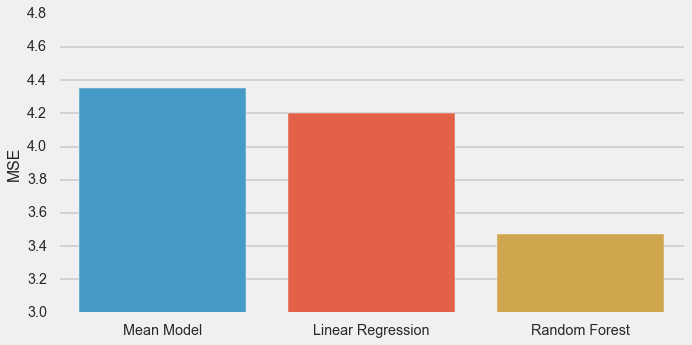

In [35]:
#### import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime
import cPickle
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("poster",font_scale = 0.9)
plt.rcParams['figure.figsize'] = (10, 5)
g = sns.barplot(['Mean Model','Linear Regression','Random Forest'],[np.mean(mse_meanModel),np.mean(mse_linModel),np.mean(mse_rfModel)])
sns.axlabel('','MSE')
g.set(ylim=(3, 4.8))

In [36]:
feat_importance = np.mean(feature_importance,axis = 0)

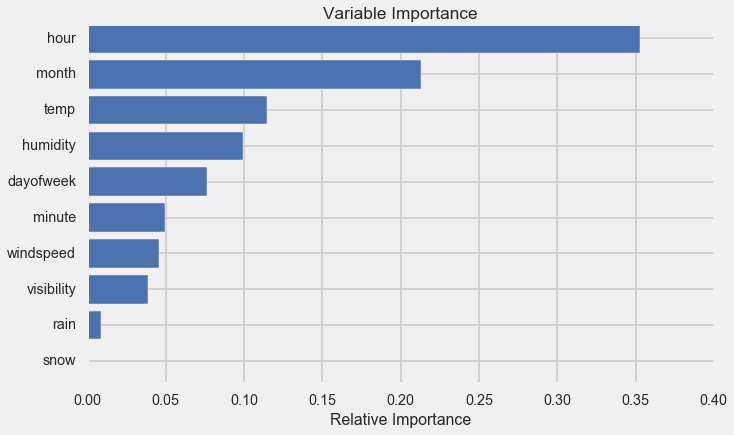

In [37]:
names = ['month','dayofweek','hour','minute','temp','humidity','windspeed','visibility','rain','snow']
imp = feat_importance
imp, names = zip(*sorted(zip(imp,names)))
# make importances relative to max importance
plt.rcParams['figure.figsize'] = (10, 6)

plt.barh(np.arange(len(names))+.6, imp, align='center')
plt.yticks(np.arange(len(names))+.6, names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Get live predictions

In [41]:
def roundTime(dt=None, roundTo=60):
    if dt == None : dt = datetime.datetime.now()
    seconds = (dt - dt.min).seconds
    # // is a floor division, not a comment on following line:
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [42]:
import requests
url = 'https://www.citibikenyc.com/stations/json'
r = requests.get(url)
r.text
r.json()
r.json().keys()
print r.json()['executionTime']
r.json()['stationBeanList']
len(r.json()['stationBeanList']) # 507 docks
r.json()['stationBeanList'][0] # First key/station
from pandas.io.json import json_normalize
stations_live = json_normalize(r.json()['stationBeanList']) # convert to DF

2016-02-15 11:59:11 PM


In [40]:
stations_live.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,7,32,,72,,2016-02-15 11:57:05 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,31,1,,79,,2016-02-15 11:55:49 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,18,9,,82,,2016-02-15 11:58:24 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,20,42,,83,,2016-02-15 11:58:29 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,3,35,,116,,2016-02-15 11:55:27 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [44]:
import datetime
stations_live[stations_live['id'] == 444]
time_now = datetime.datetime.now()
print time_now
time_now_rounded = roundTime(time_now, roundTo=30*60)
print time_now_rounded

2016-02-16 00:00:58.443535
2016-02-16 00:00:00


In [51]:
stations_live['predictions'] = [np.random.randint(0,3) for x in range(stations_live.shape[0])]

In [53]:
stations_live

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,predictions
0,,7,32,,72,,2016-02-15 11:57:05 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39,2
1,,31,1,,79,,2016-02-15 11:55:49 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,2
2,,18,9,,82,,2016-02-15 11:58:24 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,1
3,,20,42,,83,,2016-02-15 11:58:29 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,1
4,,3,35,,116,,2016-02-15 11:55:27 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39,2
5,,14,5,,119,,2016-02-15 11:57:02 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19,1
6,,3,16,,120,,2016-02-15 11:58:52 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19,2
7,,9,20,,127,,2016-02-15 11:55:15 PM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31,0
8,,29,1,,128,,2016-02-15 11:58:35 PM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,1,In Service,False,30,1
9,,1,45,,137,,2016-02-15 11:55:59 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46,1


In [54]:
filename_out = 'predictions_to_CartoDB.csv'
stations_live.to_csv(filename_out)